## task 01
input 2D data and their label (in two classes)

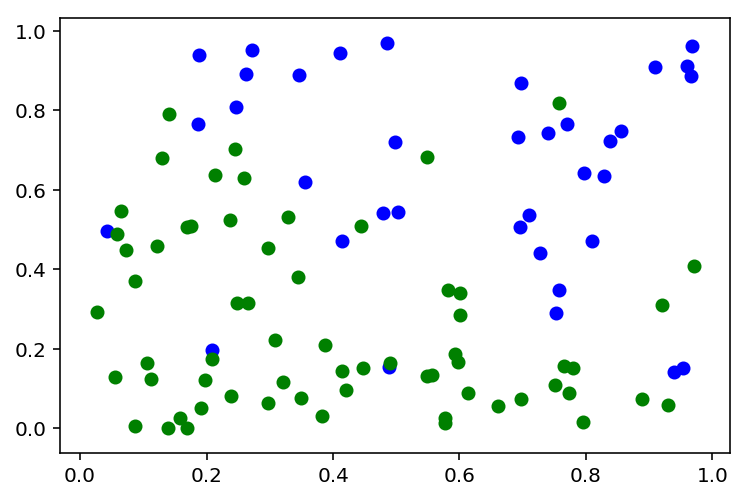

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

color_char = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm, solve, matrix_rank,LinAlgError

class Data:
    DataLength = 0
    DataDim = 2
    DataArray = None
    omega = 0
    lamda = 1
    alpha = None
    b = 0
    C = 0
    def init(self):
        self.DataArray = np.empty((self.DataDim,self.DataLength));
        self.alpha     = np.empty(self.DataLength);
        
class Label:
    LabelLength = 0
    LabelArray = None
    Class1_Num = 0
    Class2_Num = 0
    ActiveSet1 = None
    ActiveSet2 = None
    ActiveSet3 = None
    def init(self):
        self.LabelArray  = np.empty(self.LabelLength)
        self.ActiveSet1  = np.empty(self.LabelLength)
        self.ActiveSet2  = np.empty(self.LabelLength)
    def Class_Count(self):
        self.Class1_Num = np.sum(self.LabelArray ==  1)
        self.Class2_Num = np.sum(self.LabelArray == -1)

SampleData = Data()
SampleData.DataLength = 100
SampleData.init()
SampleData.DataArray = np.random.rand(SampleData.DataDim,SampleData.DataLength)#np.random.rand(SampleData.DataDim,SampleData.DataLength);np.array([[1,-1],[1,-1]])

SampleLabel = Label()
SampleLabel.LabelLength = SampleData.DataLength
SampleLabel.init()
SampleLabel.LabelArray = (SampleData.DataArray[0,:] + SampleData.DataArray[1,:] >=  1).astype(int) - \
                         (SampleData.DataArray[0,:] + SampleData.DataArray[1,:] <  1).astype(int)
#add some noise
Noise_index = np.random.randint(SampleData.DataLength, size=10)
SampleLabel.LabelArray[Noise_index] = -SampleLabel.LabelArray[Noise_index]
SampleLabel.Class_Count()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(SampleData.DataArray[0,SampleLabel.LabelArray ==  1], SampleData.DataArray[1, SampleLabel.LabelArray ==1],  c=color_char[0])  # 绘制数据点
ax.scatter(SampleData.DataArray[0,SampleLabel.LabelArray == -1], SampleData.DataArray[1, SampleLabel.LabelArray ==-1], c=color_char[1])  # 绘制数据点
plt.show()

## task 02
implement quadratic programming

假设有l个数据，最简单的情况为：

<font size=4>$$
\begin{array}{>{\kaishu } l l@{}l@{}l}
\underset{\mathbf{\omega}, \mathbf{b}}{min} & \frac{1}{2}\mathbf{\omega}^T\mathbf{\omega}& \\
s.t. & y_i((\mathbf{\omega}^Tx_i)+\mathbf{b})\ge1, & \\
\end{array}
$$</font>

然而进行quadratic programming，需要我们知道上述方程的一个可行解，参照线性规划的思路，类似的，我们提出两种方法来解决该问题：

第一种方法：构造一个子问题来求初始解，构造的子问题可以是如下的线性规划：

<font size=4>$$
\begin{array}{>{\kaishu } l l@{}l@{}l}
\underset{\mathbf{\omega}, \mathbf{b}}{min} & \sum_{i=1}^{l}\varepsilon_i& \\
s.t. & y_i((\mathbf{\omega}^Tx_i)+\mathbf{b})\ge1-\varepsilon_i, & \\
& \varepsilon_i \ge0, & i = 1,\cdots,l \\
\end{array}
$$</font>

也可以是如下的二次规划：
<font size=4>$$
\begin{array}{>{\kaishu } l l@{}l@{}l}
\underset{\mathbf{\omega}, \mathbf{b}}{min} & \sum_{i=1}^{l}\varepsilon_i^2& \\
s.t. & y_i((\mathbf{\omega}^Tx_i)+\mathbf{b})\ge1-\varepsilon_i, & \\
& \varepsilon_i \ge0, & i = 1,\cdots,l \\
\end{array}
$$</font>

第二种方法：大数法，加上一个很大的正则项：

<font size=4>$$
\begin{array}{>{\kaishu } l l@{}l@{}l}
\underset{\mathbf{\omega}, \mathbf{b}}{min} & \frac{1}{2}\mathbf{\omega}^T\mathbf{\omega} + C(\sum_{i=1}^{l}\varepsilon_i) & \\
s.t. & y_i((\mathbf{\omega}^Tx_i)+\mathbf{b})\ge1-\varepsilon_i, & \\
& \varepsilon_i \ge0, & i = 1,\cdots,l \\
\end{array}
$$</font>

或者：

<font size=4>$$
\begin{array}{>{\kaishu } l l@{}l@{}l}
\underset{\mathbf{\omega}, \mathbf{b}}{min} & \frac{1}{2}\mathbf{\omega}^T\mathbf{\omega} + \frac{C}{2}(\sum_{i=1}^{l}\varepsilon_i^2) & \\
s.t. & y_i((\mathbf{\omega}^Tx_i)+\mathbf{b})\ge1-\varepsilon_i, & \\
& \varepsilon_i \ge0, & i = 1,\cdots,l \\
\end{array}
$$</font>

由于大数法可以同时处理数据有噪声的情况，在这里我们选用大数法。实际实验中发现，若将最小化问题设为：

<font size=4>$$
\begin{array}{>{\kaishu } l l@{}l@{}l}
\underset{\mathbf{\omega}, \mathbf{b}}{min} & \frac{1}{2}\mathbf{\omega}^T\mathbf{\omega} + C(\sum_{i=1}^{l}\varepsilon_i) \\
\end{array}
$$</font>

则在使用Lagrange乘子法求解时会有矩阵为奇异矩阵的情况，为规避该问题，我们设优化问题为：

<font size=4>$$
\begin{array}{>{\kaishu } l l@{}l@{}l}
\underset{\mathbf{\omega}, \mathbf{b}}{min} & \frac{1}{2}\mathbf{\omega}^T\mathbf{\omega} + \frac{C}{2}(\sum_{i=1}^{l}\varepsilon_i^2) & \\
\end{array}
$$</font>

optimization finished

omega  [1.40683604 2.28905152] b  [-1.9196511] 



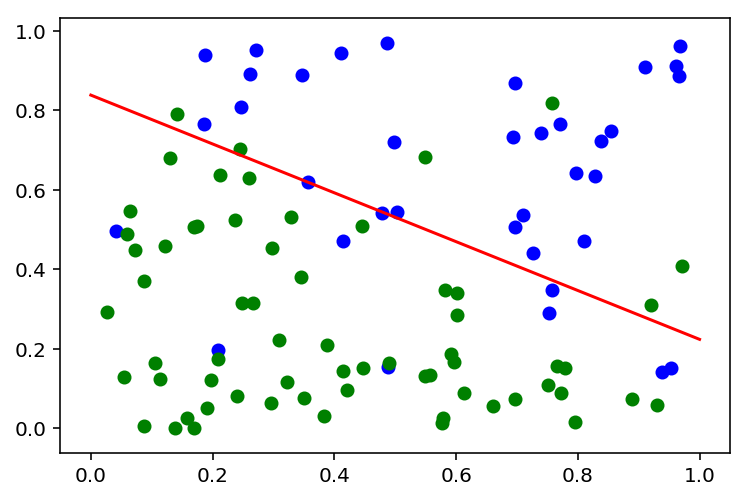

In [2]:
def lineplot(omega,b):
    
    line_dot1_x = 0
    line_dot1_y = -b/omega[1]
    if line_dot1_y < 0:
        line_dot1_y = 0;
        line_dot1_x = -b/omega[0]
    elif line_dot1_y > 1:
        line_dot1_y = 1
        line_dot1_x = -(b + omega[1])/omega[0]

    line_dot2_x = 1
    line_dot2_y = -(b +  omega[0])/omega[1]
    if line_dot2_y < 0:
        line_dot2_y = 0
        line_dot2_x = -b/omega[0]
    elif line_dot2_y > 1:
        line_dot2_y = 1;
        line_dot2_x = -(b + omega[1])/omega[0]
        
    return line_dot1_x, line_dot2_x, line_dot1_y, line_dot2_y

SampleData.omega = np.random.rand(SampleData.DataDim)
SampleData.b = np.random.rand(1)
SampleData.C = 10000

h = np.zeros(SampleData.DataDim + SampleData.DataLength + 1)
h[0:SampleData.DataDim] = 1
h[SampleData.DataDim + 1:] = SampleData.C
H = np.diag(h)

c = np.zeros(1 + SampleData.DataDim+SampleData.DataLength)

x = np.multiply(SampleLabel.LabelArray,np.dot(SampleData.omega,SampleData.DataArray) + SampleData.b)
epsilon = (1 - x)
SampleLabel.ActiveSet1 = epsilon >= 0
SampleLabel.ActiveSet2 = epsilon  < 0
epsilon[SampleLabel.ActiveSet2] = 0
x = x + epsilon

A1 = np.multiply(SampleLabel.LabelArray,SampleData.DataArray)
A1 = np.vstack((A1, SampleLabel.LabelArray))
A1 = A1.T
A1_f = np.hstack((A1, np.eye(SampleLabel.LabelLength)))

A21 = np.zeros((SampleLabel.LabelLength,SampleData.DataDim + 1))
A22 = np.eye(SampleLabel.LabelLength)
A2_f = np.hstack((A21, A22))

b1_f = np.ones(SampleLabel.LabelLength)
b2_f = np.zeros(SampleLabel.LabelLength)
max_iteration = 200
for iteration in range(max_iteration):
    if np.all(SampleLabel.ActiveSet1 == False):
        #sacle down omega,b and epsilon to incorporate one more constraint
        index1 = np.argmin(x)
        alpha = 1/np.min(x)
        SampleData.omega = alpha*SampleData.omega
        SampleData.b = alpha*SampleData.b
        epsilon = alpha* epsilon 
        x = np.multiply(SampleLabel.LabelArray,np.dot(SampleData.omega,SampleData.DataArray) + SampleData.b) + epsilon
        SampleLabel.ActiveSet1[index1] = True

    A1 = A1_f[SampleLabel.ActiveSet1,:]
    A2 = A2_f[SampleLabel.ActiveSet2,:]
    A = np.vstack((A1,A2))
    
    b1 = b1_f[SampleLabel.ActiveSet1]
    b2 = b2_f[SampleLabel.ActiveSet2]
    b = np.hstack((b1,b2))
    
    A_solve_1 = np.hstack((H, A.T))
    A_solve_2 = np.hstack((A, np.zeros((A.shape[0],A.shape[0]))))
    A_solve   = np.vstack((A_solve_1, A_solve_2))
    
    B_solve=np.hstack((c,b))
    o = solve(A_solve,B_solve) 
    step_next = o[0:SampleData.DataDim + SampleData.DataLength + 1] - np.hstack((SampleData.omega, SampleData.b, epsilon)) 
    d_epsilon = step_next[SampleData.DataDim + 1:SampleData.DataDim+SampleData.DataLength + 1];
    lamda = o[SampleData.DataDim + SampleData.DataLength + 1:];
    #  check if dx < 0 and lamda < 0
    if norm(step_next) < 1e-04:
        if np.any(lamda > 0):
            ActiveSet1_address = np.flatnonzero(SampleLabel.ActiveSet1)
            ActiveSet2_address = np.flatnonzero(SampleLabel.ActiveSet2)
            ActiveSet1_address_length = np.sum(SampleLabel.ActiveSet1)
            ActiveSet1_address_remove = ActiveSet1_address[lamda[0:ActiveSet1_address_length] > 0]
            ActiveSet2_address_remove = ActiveSet2_address[lamda[ActiveSet1_address_length :] > 0]
            SampleLabel.ActiveSet1[ActiveSet1_address_remove] = 0
            SampleLabel.ActiveSet2[ActiveSet2_address_remove] = 0
        else:
            print('optimization finished\n')
            break;
    else:
        #  determine the step length
        x_old = x;
        x = np.multiply(SampleLabel.LabelArray,np.dot(o[0:SampleData.DataDim],SampleData.DataArray) + o[SampleData.DataDim]) + \
            o[SampleData.DataDim + 1:SampleData.DataDim+SampleData.DataLength + 1]
        ## the caparison of the floating point number is not accurate, so here we only consider the constraints outside the active set.
        temp = o[SampleData.DataDim + 1:SampleData.DataDim+SampleData.DataLength + 1]  < 0
        if (np.any(x[np.logical_not(SampleLabel.ActiveSet1)] < 1) or np.any(temp[np.logical_not(SampleLabel.ActiveSet2)])):
            ActiveSet1_violated = x < 1
            ActiveSet1_violated[SampleLabel.ActiveSet1] = False
            if np.any(ActiveSet1_violated):
                ActiveSet1_violated_address = np.flatnonzero(ActiveSet1_violated)
                dx = x -x_old;
                alpha1 = np.divide(1-x_old[ActiveSet1_violated],dx[ActiveSet1_violated])
                alpha1_min = np.min(alpha1)
                index1 = np.argmin(alpha1)

            ActiveSet2_violated = o[SampleData.DataDim + 1:SampleData.DataDim+SampleData.DataLength + 1]  < 0 
            ActiveSet2_violated[SampleLabel.ActiveSet2] = False
            if np.any(ActiveSet2_violated):   
                ActiveSet2_violated_address = np.flatnonzero(ActiveSet2_violated)
                alpha2 = np.divide(-epsilon[ActiveSet2_violated],d_epsilon[ActiveSet2_violated])
                alpha2_min = np.min(alpha2)
                index2 = np.argmin(alpha2)

            #adjust the active set
            if np.all(ActiveSet1_violated ==False):
                alpha = alpha2_min
                SampleLabel.ActiveSet2[ActiveSet2_violated_address[index2]] = True
            elif np.all(ActiveSet2_violated ==False):
                alpha = alpha1_min
                SampleLabel.ActiveSet1[ActiveSet1_violated_address[index1]] = True
            elif alpha1_min < alpha2_min:
                alpha = alpha1_min
                SampleLabel.ActiveSet1[ActiveSet1_violated_address[index1]] = True
            elif alpha1_min > alpha2_min:
                alpha = alpha2_min
                SampleLabel.ActiveSet2[ActiveSet2_violated_address[index2]] = True
            else:
                alpha = alpha1_min
                SampleLabel.ActiveSet1[ActiveSet1_violated_address[index1]] = True
                SampleLabel.ActiveSet2[ActiveSet2_violated_address[index2]] = True
        else:
            alpha = 1;

        #calculate new parameters
        SampleData.omega = SampleData.omega + alpha*step_next[0:SampleData.DataDim]
        SampleData.b = SampleData.b + alpha*step_next[SampleData.DataDim]
        epsilon = epsilon + alpha* d_epsilon 
        x = np.multiply(SampleLabel.LabelArray,np.dot(SampleData.omega,SampleData.DataArray) + SampleData.b) + epsilon

if(iteration == (max_iteration -1)):
    print('iteration time exceed')

print('omega ',SampleData.omega,'b ',SampleData.b,'\n')

line_dot1_x, line_dot2_x, line_dot1_y, line_dot2_y = lineplot(SampleData.omega,SampleData.b)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(SampleData.DataArray[0,SampleLabel.LabelArray ==  1], SampleData.DataArray[1, SampleLabel.LabelArray ==1],  c=color_char[0])  # 绘制数据点
ax.scatter(SampleData.DataArray[0,SampleLabel.LabelArray == -1], SampleData.DataArray[1, SampleLabel.LabelArray ==-1], c=color_char[1])  # 绘制数据点
ax.plot([line_dot1_x, line_dot2_x], [line_dot1_y , line_dot2_y],c=color_char[2])  # 绘制数据点
plt.show()

## task 02
非线性核

<font size=4>$$
\begin{array}{>{\kaishu } l l@{}l@{}l}
\underset{\mathbf{\omega}, \mathbf{b}}{min} & \frac{1}{2}\mathbf{\omega}^T\mathbf{\omega} + C(\sum_{i=1}^{l}\varepsilon_i) & \\
s.t. & y_i((\mathbf{\omega}^T\phi(x_i))+\mathbf{b})\ge1-\varepsilon_i & \\
& \varepsilon_i \ge0, & i = 1,\cdots,l \\
\end{array}
$$</font>

将其转化为该问题的对偶问题：
<font size=4>$$
\begin{array}{>{\kaishu } l l@{}l@{}l}
\underset{\mathbf{\alpha}}{min} & \frac{1}{2}\mathbf{\alpha}^T\mathbf{H}\mathbf{\alpha}+\mathbf{c}^T\mathbf{\alpha} &\\
& \mathbf{H} = diag(\mathbf{Y})\mathbf{K}(x_i,x_j)diag(\mathbf{Y}), & \mathbf{c}=-[1,\cdots,1]^T \\
s.t. & \mathbf{Y}^T\alpha=0, &  \\
&0 \le \alpha_i \le C, & i = 1,\cdots,l \\
\end{array}
$$</font>
观察上式，我们假设$\mathbf{Y}$中1的个数有N个，-1的个数有M个，令
<font size=4>$$
\alpha_i = 
\begin{cases}
\frac{N}{l}  & y_i = -1 \\
\frac{M}{l}  & y_i =  1
\end{cases}
$$</font>
易知上式为一个可行解，可以作为${\mathbf{\alpha}}$的初始点。

首先，我们产生一个分线性分布

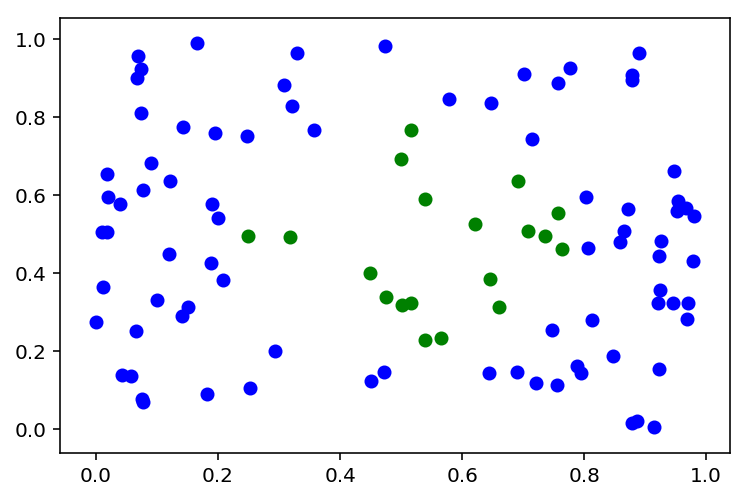

In [3]:
SampleData = Data()
SampleData.DataLength = 100
SampleData.init()
SampleData.DataArray = np.random.rand(SampleData.DataDim,SampleData.DataLength)#np.random.rand(SampleData.DataDim,SampleData.DataLength);np.array([[1,-1],[1,-1]])

SampleLabel = Label()
SampleLabel.LabelLength = SampleData.DataLength
SampleLabel.init()
SampleLabel.LabelArray = (norm(SampleData.DataArray-0.5, axis = 0) >=  0.3).astype(int) - \
                         (norm(SampleData.DataArray-0.5, axis = 0) <  0.3).astype(int)
#add some noise
#Noise_index = np.random.randint(SampleData.DataLength, size=10)
#SampleLabel.LabelArray[Noise_index] = -SampleLabel.LabelArray[Noise_index]
SampleLabel.Class_Count()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(SampleData.DataArray[0,SampleLabel.LabelArray ==  1], SampleData.DataArray[1, SampleLabel.LabelArray ==1],  c=color_char[0])  # 绘制数据点
ax.scatter(SampleData.DataArray[0,SampleLabel.LabelArray == -1], SampleData.DataArray[1, SampleLabel.LabelArray ==-1], c=color_char[1])  # 绘制数据点
plt.show()



In [42]:
SampleData.alpha = (SampleLabel.LabelArray ==  1)*SampleLabel.Class2_Num/SampleLabel.LabelLength + \
                   (SampleLabel.LabelArray == -1)*SampleLabel.Class1_Num/SampleLabel.LabelLength

data_x = SampleData.DataArray[0,:]
data_x = data_x[:,np.newaxis]
data_y = SampleData.DataArray[1,:]
data_y = data_y[:,np.newaxis]

K1 = data_x - data_x.T
K2 = data_y - data_y.T
K = np.dstack((K1,K2))
K = np.exp(-SampleData.lamda*norm(K,axis = 2))

H = np.matmul(np.matmul(np.diag(SampleLabel.LabelArray), K), np.diag(SampleLabel.LabelArray));

SampleData.C = 10000

c = np.ones(SampleData.DataLength)

SampleLabel.ActiveSet1 = np.full(SampleLabel.LabelLength, False)
SampleLabel.ActiveSet2 = np.full(SampleLabel.LabelLength, False)

A1_f = np.diag(np.ones(SampleLabel.LabelLength))
A2_f = -np.diag(np.ones(SampleLabel.LabelLength))

b1_f = np.zeros(SampleLabel.LabelLength)
b2_f = SampleData.C*np.ones(SampleLabel.LabelLength)

max_iteration = 100
for iteration in range(max_iteration):
    A1 = A1_f[SampleLabel.ActiveSet1,:]
    A2 = A2_f[SampleLabel.ActiveSet2,:]
    A = np.vstack(( SampleLabel.LabelArray,A1,A2))
    
    b1 = b1_f[SampleLabel.ActiveSet1]
    b2 = b2_f[SampleLabel.ActiveSet2]
    b = np.hstack((0,b1,b2))
    
    A_solve_1 = np.hstack((H, A.T))
    A_solve_2 = np.hstack((A, np.zeros((A.shape[0],A.shape[0]))))
    A_solve   = np.vstack((A_solve_1, A_solve_2))

    B_solve=np.hstack((c,b))
    o = solve(A_solve,B_solve) 
    alpha_new = o[0:SampleData.DataLength]
    step_next = alpha_new - SampleData.alpha
    # the first constraint is not considered since it's '='
    lamda = o[SampleData.DataLength + 1:]
    #  check if dx < 0 and lamda < 0
    if norm(step_next) < 1e-04:
        if np.any(lamda > 0):
            ActiveSet1_address = np.flatnonzero(SampleLabel.ActiveSet1)
            ActiveSet2_address = np.flatnonzero(SampleLabel.ActiveSet2)
            
            ActiveSet1_address_length = np.sum(SampleLabel.ActiveSet1)
            
            ActiveSet1_address_remove = ActiveSet1_address[lamda[0:ActiveSet1_address_length] > 0]
            ActiveSet2_address_remove = ActiveSet2_address[lamda[ActiveSet1_address_length :] > 0]
            
            SampleLabel.ActiveSet1[ActiveSet1_address_remove] = 0
            SampleLabel.ActiveSet2[ActiveSet2_address_remove] = 0
        else:
            print('optimization finished\n')
            break;
    else:
        #  determine the step length
        ## the caparison of the floating point number is not accurate, so here we only consider the constraints outside the active set.
        ActiveSet1_violated = alpha_new < 0
        ActiveSet1_violated[SampleLabel.ActiveSet1] = False
        
        ActiveSet2_violated = alpha_new > SampleData.C
        ActiveSet2_violated[SampleLabel.ActiveSet2] = False
        if np.any(ActiveSet1_violated) or np.any(ActiveSet2_violated):   
            if np.any(ActiveSet1_violated):
                ActiveSet1_violated_address = np.flatnonzero(ActiveSet1_violated)
                a1 = np.divide(-SampleData.alpha[ActiveSet1_violated],step_next[ActiveSet1_violated])
                a1_min = np.min(a1)
                index1 = np.argmin(a1)
            
            if np.any(ActiveSet2_violated):   
                ActiveSet2_violated_address = np.flatnonzero(ActiveSet2_violated)
                a2 = np.divide(SampleData.C-SampleData.alpha[ActiveSet2_violated],step_next[ActiveSet2_violated])
                a2_min = np.min(a2)
                index2 = np.argmin(a2)

            #adjust the active set
            if np.all(ActiveSet1_violated ==False):
                a = a2_min
                SampleLabel.ActiveSet2[ActiveSet2_violated_address[index2]] = True
            elif np.all(ActiveSet2_violated ==False):
                a = a1_min
                SampleLabel.ActiveSet1[ActiveSet1_violated_address[index1]] = True
            elif a1_min < a2_min:
                a = a1_min
                SampleLabel.ActiveSet1[ActiveSet1_violated_address[index1]] = True
            elif al_min > a2_min:
                a = a2_min
                SampleLabel.ActiveSet2[ActiveSet2_violated_address[index2]] = True
            else:
                a  = a1_min
                SampleLabel.ActiveSet1[ActiveSet1_violated_address[index1]] = True
                SampleLabel.ActiveSet2[ActiveSet2_violated_address[index2]] = True
        else:
            a = 1;

        #calculate new parameters
        SampleData.alpha = SampleData.alpha + a*step_next

if(iteration == (max_iteration -1)):
    print('iteration time exceed')

optimization finished



下图为最终的结果，左图为实际数据，右图为使用非线性核的支持向量机的分割结果。可以看到我们采用非线性的高斯核之后，可以成功地分割这两类数据。

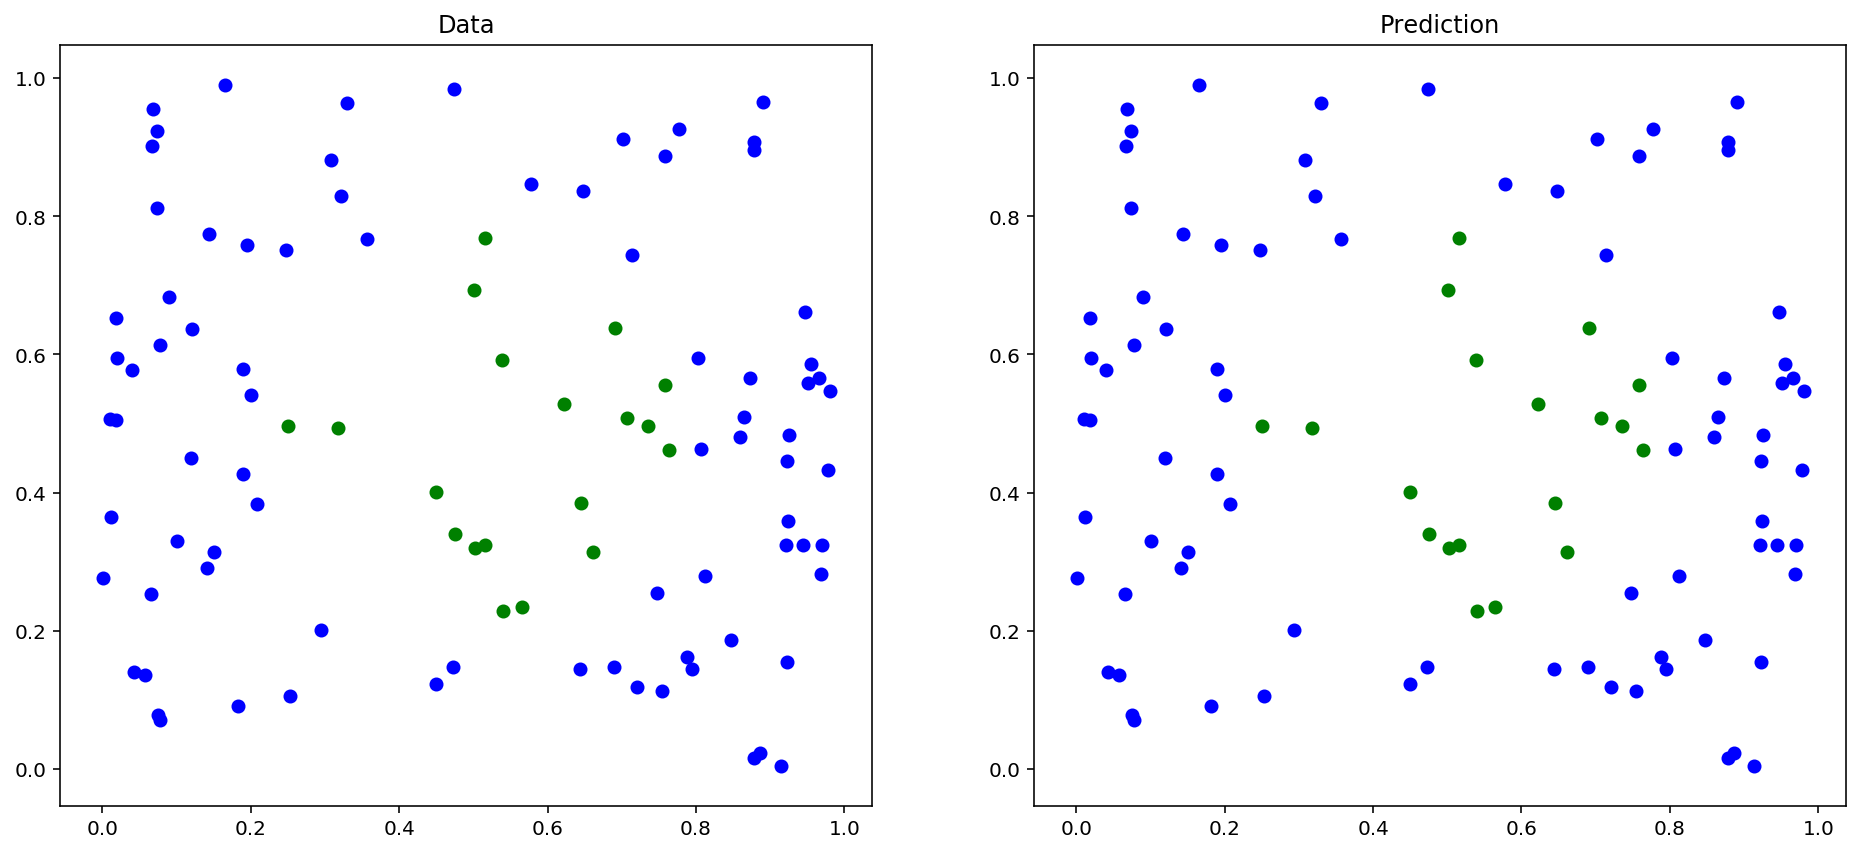

In [54]:
Y_part1 = np.dot(np.multiply(SampleLabel.LabelArray,SampleData.alpha), K)
Active_constraints = np.logical_not(np.logical_or(SampleLabel.ActiveSet1,SampleLabel.ActiveSet2))
B = np.divide(1, SampleLabel.LabelArray[Active_constraints]) -  Y_part1[Active_constraints]
SampleData.b = np.mean(B)
Y  = Y_part1 + SampleData.b
prediction_Set1 = Y >= 0
prediction_Set2 = Y < 0 
fig = plt.figure(figsize=(16,7))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(SampleData.DataArray[0,SampleLabel.LabelArray ==  1], SampleData.DataArray[1, SampleLabel.LabelArray ==1],  c=color_char[0])  # 绘制数据点
ax.scatter(SampleData.DataArray[0,SampleLabel.LabelArray == -1], SampleData.DataArray[1, SampleLabel.LabelArray ==-1], c=color_char[1])  # 绘制数据点
ax.set_title(r'Data')

ax = fig.add_subplot(1, 2, 2)
ax.scatter(SampleData.DataArray[0,prediction_Set1], SampleData.DataArray[1, prediction_Set1],  c=color_char[0])  # 绘制数据点
ax.scatter(SampleData.DataArray[0,prediction_Set2], SampleData.DataArray[1, prediction_Set2], c=color_char[1])  # 绘制数据点
ax.set_title(r'Prediction')

plt.show()